<a href="https://colab.research.google.com/github/moroq2/AI-2024-S2/blob/main/2024_s2_efficientnet_r1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#画像データに対して、10種類のラベルの1つを割り当てるモデルを作成していただきます

画像認識とは、画像および動画から文字や顔などのオブジェクトや特徴を認識し検出するパターン認識技術の一分野です。特に画像に対してラベルを割り当てる画像分類は画像認識の領域においてポピュラーな研究分野となっていて、最近は深層学習が圧倒的な精度を達成しています。今回は犬や猫などの動物や車などの無機物が写った画像に対して10種類のラベルから一つ割り当てる問題に挑戦していただきます。

本コンペを活用して、データ解析・モデル構築を体験してください。

データ概要

課題種別：分類
データ種別：画像
学習データサンプル数：5,000
画像の大きさ：96×96

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Num GPUs Available:  1
Found 4000 validated image filenames belonging to 10 classes.
Found 1000 validated image filenames belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.4498 - loss: 1.7030 - val_accuracy: 0.8825 - val_loss: 0.3945
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.8431 - loss: 0.4843 - val_accuracy: 0.8925 - val_loss: 0.2947
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.8670 - loss: 0.3808 - val_accuracy: 0.9062 - val_loss: 0.2497
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.8904 - loss: 0.3322 - val_accuracy: 0.9175 - val_loss: 0.2549
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9043 - loss: 0.2796 - val_accuracy: 0.9287 - val_loss: 0.2304
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.9100 - loss: 0.2601 - val_accuracy: 0.9212 - val_loss: 0.2413
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.9115 - loss: 0.2598 - val_accuracy: 0.9175 - val_loss: 0.2339
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.9163 - loss: 0.2407 - val_accuracy: 0.9200 - val_loss

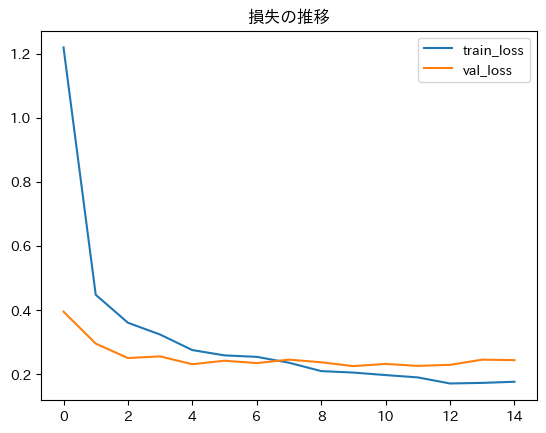

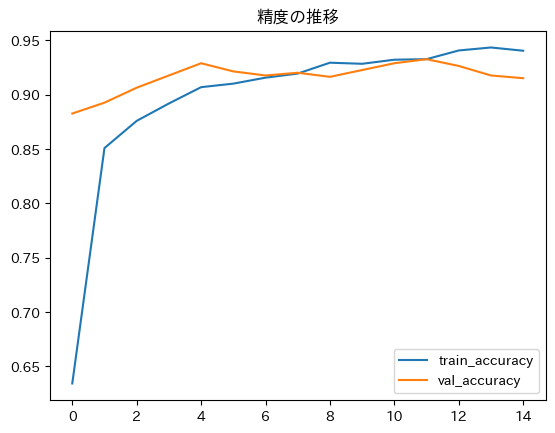

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.9281 - loss: 0.2392 - val_accuracy: 0.9287 - val_loss: 0.2270
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9311 - loss: 0.2075 - val_accuracy: 0.9275 - val_loss: 0.2255
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.9411 - loss: 0.1972 - val_accuracy: 0.9350 - val_loss: 0.2239
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.9478 - loss: 0.1846 - val_accuracy: 0.9300 - val_loss: 0.2306
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.9505 - loss: 0.1695 - val_accuracy: 0.9175 - val_loss: 0.2315
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9391 - loss: 0.1755 - val_accuracy: 0.9237 - val_loss: 0.2371


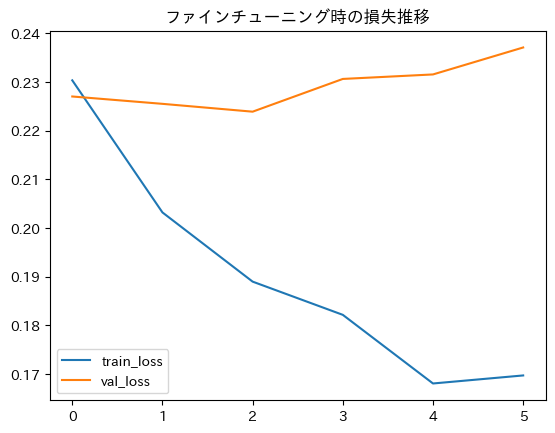

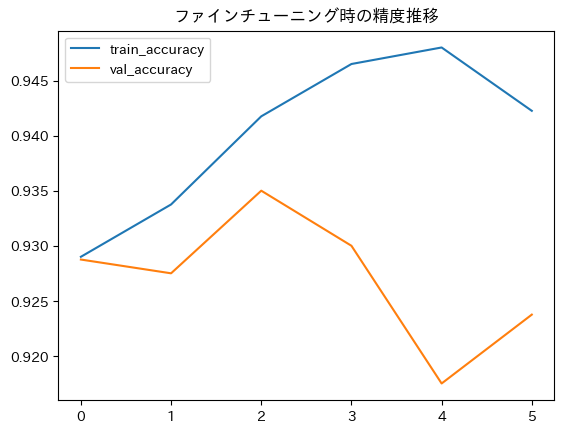

Found 8000 validated image filenames.
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 798ms/step
提出用ファイル /content/drive/MyDrive/Colab Notebooks/AI_2024_S2/submission_efficientnet_0319_r0.tsv を作成しました。


In [ ]:
# ========================================
# Google Colab 上で GPU を使用する想定
# ========================================

# 1. Google Drive をマウント
from google.colab import drive
drive.mount('/content/drive')

# ★★★ 日本語表示のためのライブラリをインストール＆インポート ★★★
!pip install japanize_matplotlib
import japanize_matplotlib

# 2. ファイルパスの設定
base_dir = "/content/drive/MyDrive/Colab Notebooks/AI_2024_S2"

# 3. GPUが利用可能か確認
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# 4. 必要なライブラリのインポート
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# データ解凍（既に存在する場合はスキップ）
if not os.path.exists("train_images"):
    os.system(f"unzip -q '{base_dir}/train_images.zip'")
    os.system(f"unzip -q '{base_dir}/test_images.zip'")
    !cp "{base_dir}/label_master.tsv" .
    !cp "{base_dir}/sample_submit.tsv" .
    !cp "{base_dir}/train_master.tsv" .

# 5. 学習用マスタファイルとラベルファイルの読み込み
train_master = pd.read_csv('train_master.tsv', sep='\t')
label_master = pd.read_csv('label_master.tsv', sep='\t')
train_master['label_id'] = train_master['label_id'].astype(str)

# 6. 学習済みモデル用の前処理（EfficientNetB0 用）
#    ※ MobileNetV2 → EfficientNetB0 に変更
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

# 7. データ前処理とデータ拡張
#    brightness_range（輝度調整）を含むデータ拡張を使用
#    EfficientNetB0 の統計に合わせた preprocessing_function を利用
datagen_train = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2,  # 学習データの20%を検証用に分割
    brightness_range=[0.8, 1.2],  # 輝度の最適化
    preprocessing_function=preprocess_input
)

datagen_val = ImageDataGenerator(
    validation_split=0.2,
    brightness_range=[0.8, 1.2],
    preprocessing_function=preprocess_input
)

# 8. トレーニング用・バリデーション用のジェネレータ
train_generator = datagen_train.flow_from_dataframe(
    dataframe=train_master,
    directory="train_images",
    x_col='file_name',
    y_col='label_id',
    target_size=(224, 224),
    batch_size=400,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen_val.flow_from_dataframe(
    dataframe=train_master,
    directory="train_images",
    x_col='file_name',
    y_col='label_id',
    target_size=(224, 224),
    batch_size=400,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

# 9. EfficientNetB0 を使った転移学習モデルの構築
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def build_transfer_model(input_shape=(224,224,3), num_classes=10):
    # 事前学習済みの EfficientNetB0 を読み込み（最終の全結合層なし）
    base_model = EfficientNetB0(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )

    # ベースモデルを一旦固定（freeze）
    for layer in base_model.layers:
        layer.trainable = False

    # 独自の出力層を追加
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    # コンパイル
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# モデルを構築
model = build_transfer_model(input_shape=(224,224,3), num_classes=10)

# 10. モデルの学習（ベースモデルは固定したまま）
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_efficientnet.keras', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=30,
    callbacks=callbacks
)

# 学習履歴のグラフを作成
# -- Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('損失の推移')
plt.legend()
plt.show()

# -- Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('精度の推移')
plt.legend()
plt.show()

# ======== ファインチューニングステップを追加 ========
# 後ろから20層を解凍して再学習する例
for layer in model.layers[-20:]:
    layer.trainable = True

# 再コンパイル（学習率はさらに小さくする）
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model_efficientnet_finetuned.keras', monitor='val_loss', save_best_only=True)
]

history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
    callbacks=fine_tune_callbacks
)

# ファインチューニング時の学習推移を可視化
plt.figure()
plt.plot(history_finetune.history['loss'], label='train_loss')
plt.plot(history_finetune.history['val_loss'], label='val_loss')
plt.title('ファインチューニング時の損失推移')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_finetune.history['accuracy'], label='train_accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='val_accuracy')
plt.title('ファインチューニング時の精度推移')
plt.legend()
plt.show()

# 11. テストデータでの推論と提出ファイルの作成
test_filenames = os.listdir("test_images")
test_df = pd.DataFrame({'file_name': test_filenames})

# テストでも同じ前処理を適用 (データ拡張なし)
test_datagen = ImageDataGenerator(
    brightness_range=[0.8, 1.2],
    preprocessing_function=preprocess_input
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="test_images",
    x_col='file_name',
    y_col=None,
    target_size=(224,224),
    batch_size=400,
    class_mode=None,
    shuffle=False
)

# 推論
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# 提出用ファイルの作成
submission = pd.DataFrame({'file_name': test_filenames, 'label_id': predicted_classes})

# 数値抽出してソート
submission['file_num'] = submission['file_name'].str.extract(r'(\d+)').astype(int)
submission = submission.sort_values(by='file_num').drop(columns='file_num')

# ソート後の提出用ファイルを保存
output_filename = f'{base_dir}/submission_efficientnet_0319_r0.tsv'
submission.to_csv(output_filename, sep='\t', index=False, header=False)
print(f"提出用ファイル {output_filename} を作成しました。")
